In [3]:
import pandas as pd
import numpy as np
import kinematics as kin
import matplotlib.pyplot as plt

# Classwork 5
In our module kinematics, i wrote a function to integrate a set of data, and a function to zero said set of data given an initial period of calibration. The integration function utilizes the Trapezoidal integration rule, and the zero function simply takes the average value of the calibration period, then subtracts that value from the entire data set. However, even with this add, the position data set that is acquired ends up fairly inaccurate and I'm not sure why yet. Here, I've read in all the data from a Helix motion, and plotted the x acceleration, the x velocity, and the x position. 

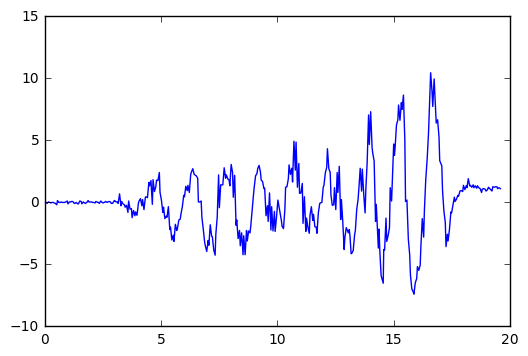

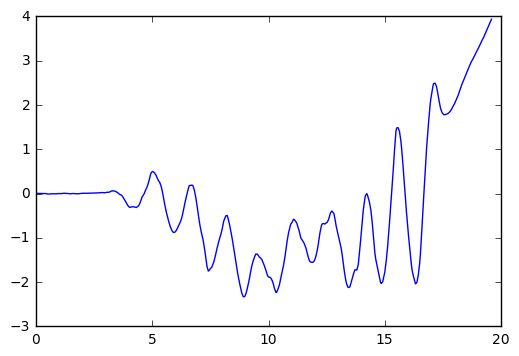

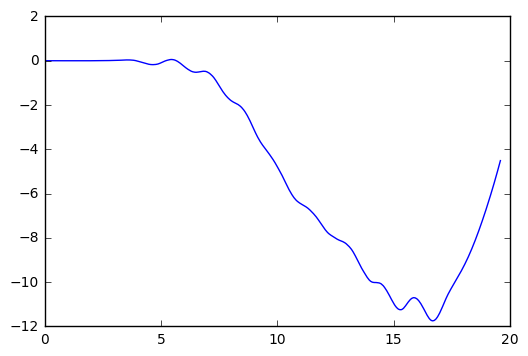

In [2]:
#getting acceleration values
df = pd.read_csv('HelixAcceleration.csv')
t = df[' t']

#use zero function in module to zero each acceleration;
#also multiply by 9.81 to changes units from g to m/s^2

#The data set was taken with a 2s (43 interval) calibration period
#such that i can say a(0)=0, v(0)=0, x(0)=0

a_x = kin.zero(df[' Acceleration X (g)']*9.81,0,43)
a_y = kin.zero(df[' Acceleration Y (g)']*9.81,0,43)
a_z = kin.zero(df[' Acceleration Z (g)']*9.81,0,43)

v_x = kin.zero(kin.integral(t, a_x),0,43)
v_y = kin.zero(kin.integral(t, a_y),0,43)
v_z = kin.zero(kin.integral(t, a_z),0,43)

x = kin.zero(kin.integral(t, v_x),0,43)
y = kin.zero(kin.integral(t, v_y),0,43)
z = kin.zero(kin.integral(t, v_z),0,43)

plt.plot(t, a_x)
plt.show()

plt.plot(t, v_x)
plt.show()

plt.plot(t, x)
plt.show()

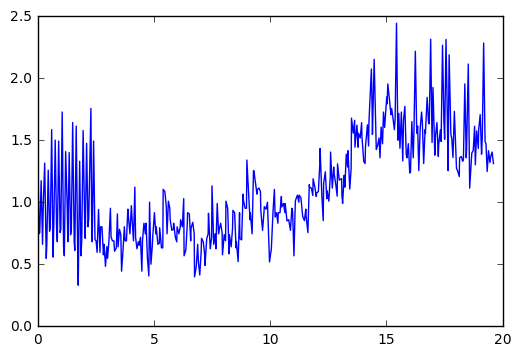

In [6]:
#getting barometric altitude values
dfb = pd.read_csv('HelixBarometer.csv')
alt = dfb[' Pressure Altitude (m)']
t = dfb[' t']

plt.plot(t,alt)
plt.show()